# Proyecto Estacaliente - Estadistica Computacional

### Grupo 10

Integrantes:
* Renato Ramirez 
* Matias Torrejon
* Benjamin Pavez
* Diego Cisternas

Consideraciones:
* Antes de subir el archivo a Github se le hizo una limpieza de los valores '?', de las columnas que no utilizaremos y de los juegos que no consideraremos.
* El criterio que utilizamos para seleccionar los juegos considerados fue a través de la cantidad de apariciones en el dataset, es decir, los que tenían mayor cantidad de registros.

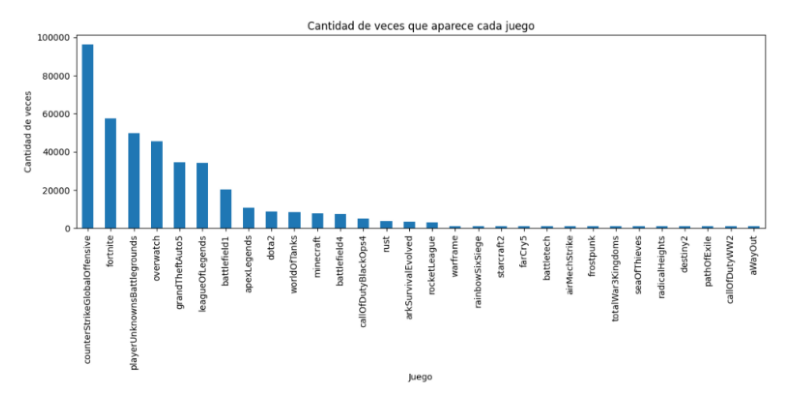

In [281]:
import matplotlib.pyplot as plt
import urllib
from PIL import Image
import numpy as np
import pandas as pd
import seaborn as sns

url2 = 'https://github.com/BenjaminPavez/Estadistica-Computacional-INF280/blob/main/grafico1.png?raw=true'
img = np.array(Image.open(urllib.request.urlopen(url2)))
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

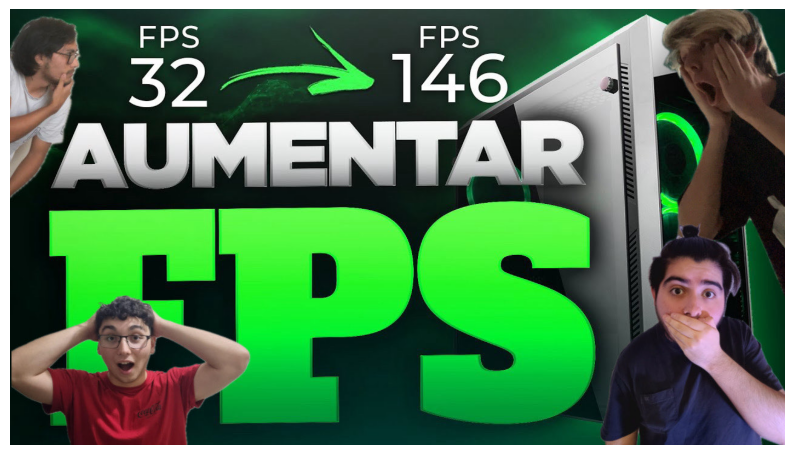

In [282]:
url = "https://github.com/BenjaminPavez/Estadistica-Computacional-INF280/blob/main/miniatura.jpg?raw=true"
img = np.array(Image.open(urllib.request.urlopen(url)))

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

## Entrega Proyecto 1

## Introducción

En la actualidad, el disfrute de los videojuegos en PC es una actividad ampliamente extendida, tanto de manera casual como dedicada. Sin embargo, para garantizar una experiencia de juego óptima, se requiere disponer de componentes de hardware capaces de ejecutar los juegos de manera fluida, permitiendo así disfrutar al máximo de las capacidades visuales y de rendimiento que estos ofrecen. En este sentido, dos de los componentes más críticos para lograr un buen desempeño son el procesador (CPU) y la tarjeta gráfica (GPU), cuya potencia determina en gran medida la calidad y fluidez de las imágenes generadas, expresada en el número de cuadros por segundo (FPS).

Dada la relevancia de estos componentes y su frecuente actualización para satisfacer las demandas de los videojuegos más exigentes, se busca estudiar qué juegos son más sensibles a los cambios en el hardware. Es decir, identificar aquellos en los que una mejora en CPU o GPU no resulta en una diferencia significativa en los FPS, así como aquellos cuyo rendimiento ya alcanza niveles óptimos y donde una mejora adicional carece de utilidad práctica. Este estudio tiene como objetivo discernir en qué juegos no justifica invertir un presupuesto adicional en la actualización de componentes, considerando que el límite de percepción visual del ojo humano y las limitaciones técnicas de los monitores pueden hacer que diferencias extremas en FPS no sean perceptibles ni aprovechables. 

**Variables principales:**

1.   GameName
2.   GpuName

**Variables secundarias:**

1.   CpuName
2.   CpuNumberOfCores
3.   CpuNumberOfThreads
4.   CpuFrequency
5.   GpuMemorySize
6.   GameResolution 
7.   GameSetting (low, med, high, max)
8.   FPS

## Pregunta
¿Cuáles juegos son más sensibles al tipo de hardware (CPU y GPU) utilizado?, A partir de esto, ¿en cuales no vale la pena invertir un mayor presupuesto para mejorar significativamente los FPS al jugar?


In [283]:
#Cargar archivo csv desde GitHub
url_archivo = 'https://raw.githubusercontent.com/BenjaminPavez/Estadistica-Computacional-INF280/main/Dataset/fps_videogamesv3.csv'

#Limpia valores con '?'
df = pd.read_csv(url_archivo, low_memory=False, na_values='?')
df = df.dropna()    

En esta situación, los valores atípicos representan de forma más válida la realidad, ya que el rendimiento de los juegos puede variar ampliamente debido a factores del mismo, tal como su resolución, gráficos y optimización, es por eso que eliminando valores atípicos estaríamos eliminando información importante, sobre todo para contestar la pregunta planteada, la cual requiere que se identifiquen juegos con casos extremos en los cuales existe una diferencia considerable de FPS, por lo que son necesarios para mantener la precisión del estudio.

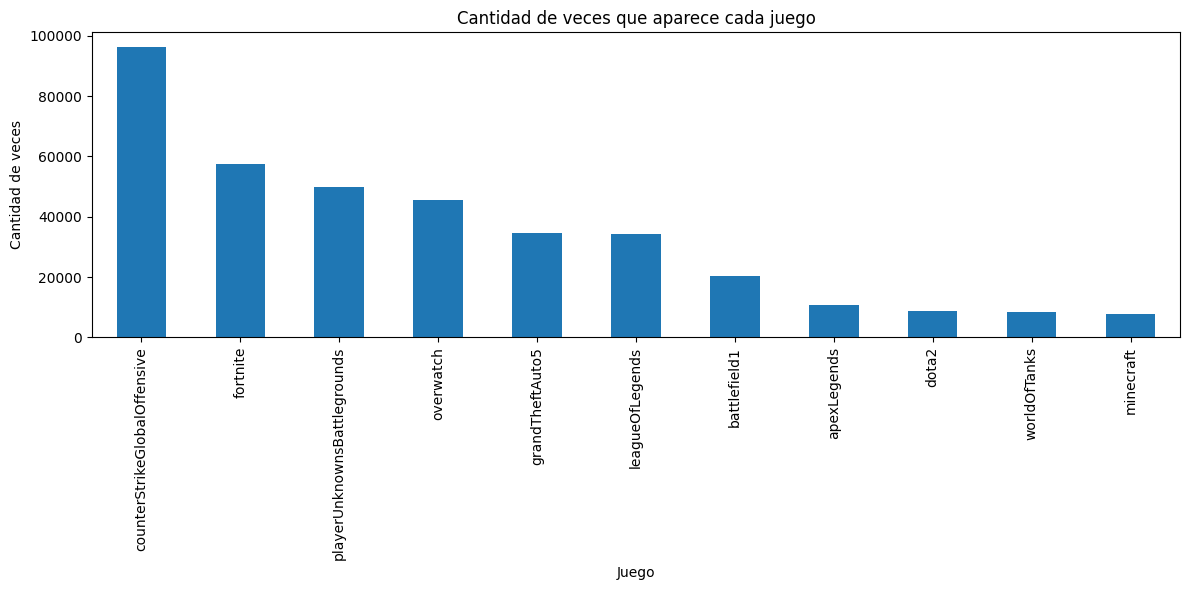

In [284]:
#Graficar la cantidad de veces que aparece cada juego
juegos_count = df['GameName'].value_counts()

plt.figure(figsize=(12, 6))
juegos_count.plot(kind='bar')
plt.xlabel('Juego')
plt.ylabel('Cantidad de veces')
plt.title('Cantidad de veces que aparece cada juego')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

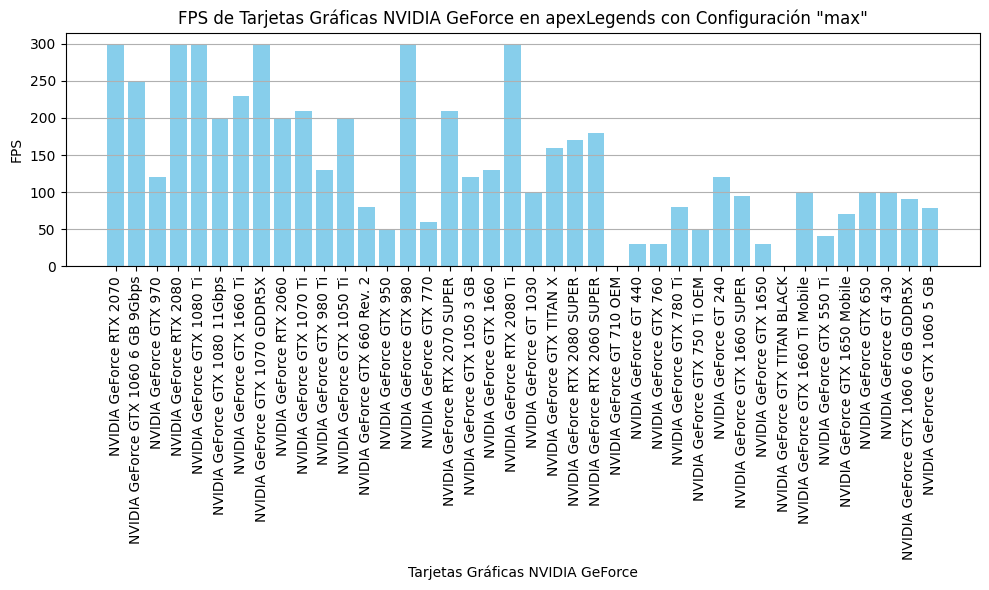

In [285]:
#Grafico de barras, Tarjetas Gráficas NVIDIA GeForce en 'apexLegends' con Configuración 'max' vs FPS

df_nvidia_rtx_max1 = df[(df['GpuName'].str.contains('NVIDIA GeForce', case=False)) & (df['GameName'] == 'apexLegends') & (df['GameSetting'] == 'max')]

plt.figure(figsize=(10, 6))
plt.bar(df_nvidia_rtx_max1['GpuName'], df_nvidia_rtx_max1['FPS'], color='skyblue')
plt.title('FPS de Tarjetas Gráficas NVIDIA GeForce en apexLegends con Configuración "max"')
plt.xlabel('Tarjetas Gráficas NVIDIA GeForce')
plt.ylabel('FPS')
plt.xticks(rotation=90) 
plt.grid(axis='y') 
plt.tight_layout()
plt.show()

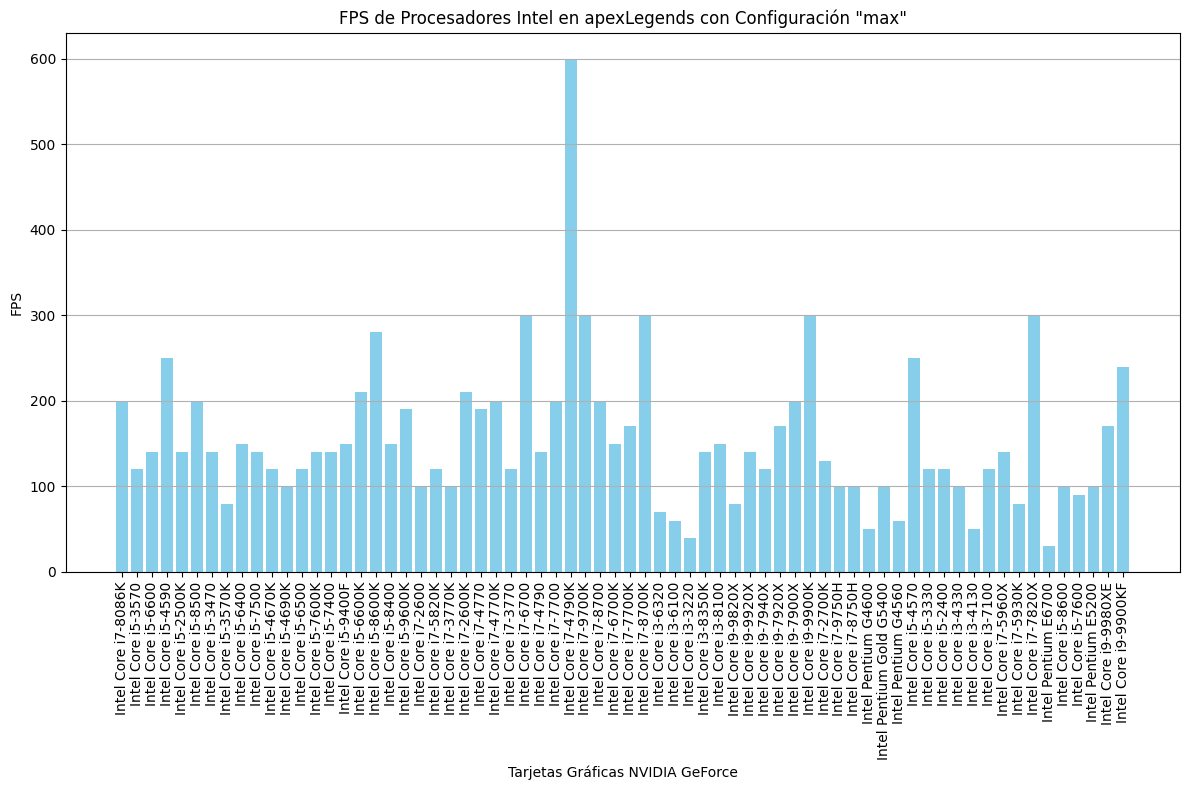

In [286]:
#Grafico de barras, Procesadores Intel en 'apexLegends' con Configuración 'max' vs FPS

df_nvidia_rtx_max = df[(df['CpuName'].str.contains('Intel', case=False)) & (df['GameName'] == 'apexLegends') & (df['GameSetting'] == 'max')]

plt.figure(figsize=(12, 8))
plt.bar(df_nvidia_rtx_max['CpuName'], df_nvidia_rtx_max['FPS'], color='skyblue')
plt.title('FPS de Procesadores Intel en apexLegends con Configuración "max"')
plt.xlabel('Tarjetas Gráficas NVIDIA GeForce')
plt.ylabel('FPS')
plt.xticks(rotation=90) 
plt.grid(axis='y') 
plt.tight_layout()
plt.show()

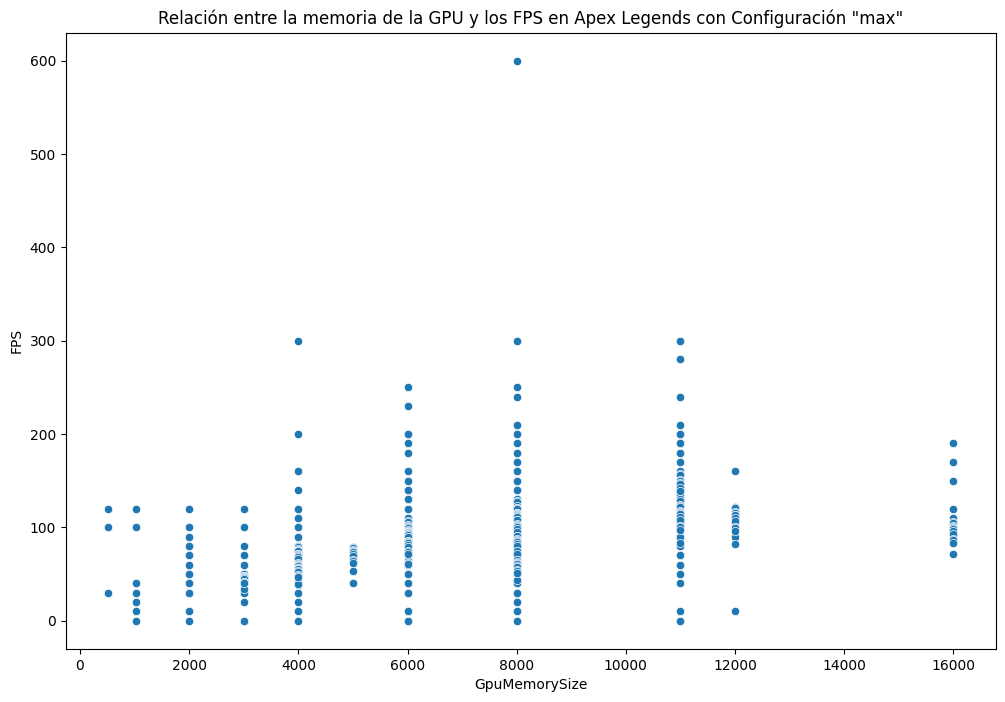

In [287]:
#Grafico de barras, Tarjetas Gráficas NVIDIA GeForce en 'apexLegends' con Configuración 'max' vs FPS

df_apex_legends = df[(df['GameName'] == 'apexLegends') & (df['GameSetting'] == 'max')]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='GpuMemorySize', y='FPS', data=df_apex_legends)
plt.title('Relación entre la memoria de la GPU y los FPS en Apex Legends con Configuración "max"')
plt.xlabel('GpuMemorySize')
plt.ylabel('FPS')
plt.show()

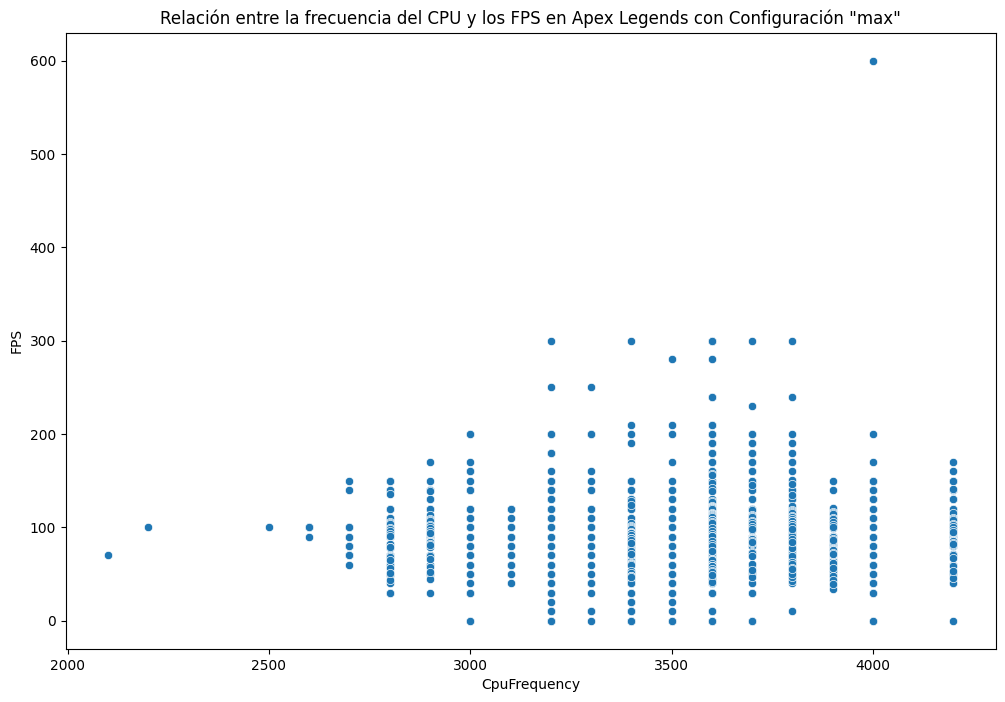

In [288]:
#Grafico de barras, Tarjetas Gráficas NVIDIA GeForce en 'apexLegends' con Configuración 'max' vs FPS

df_apex_legends = df[(df['GameName'] == 'apexLegends') & (df['GameSetting'] == 'max')]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='CpuFrequency', y='FPS', data=df_apex_legends)
plt.title('Relación entre la frecuencia del CPU y los FPS en Apex Legends con Configuración "max"')
plt.xlabel('CpuFrequency')
plt.ylabel('FPS')
plt.show()

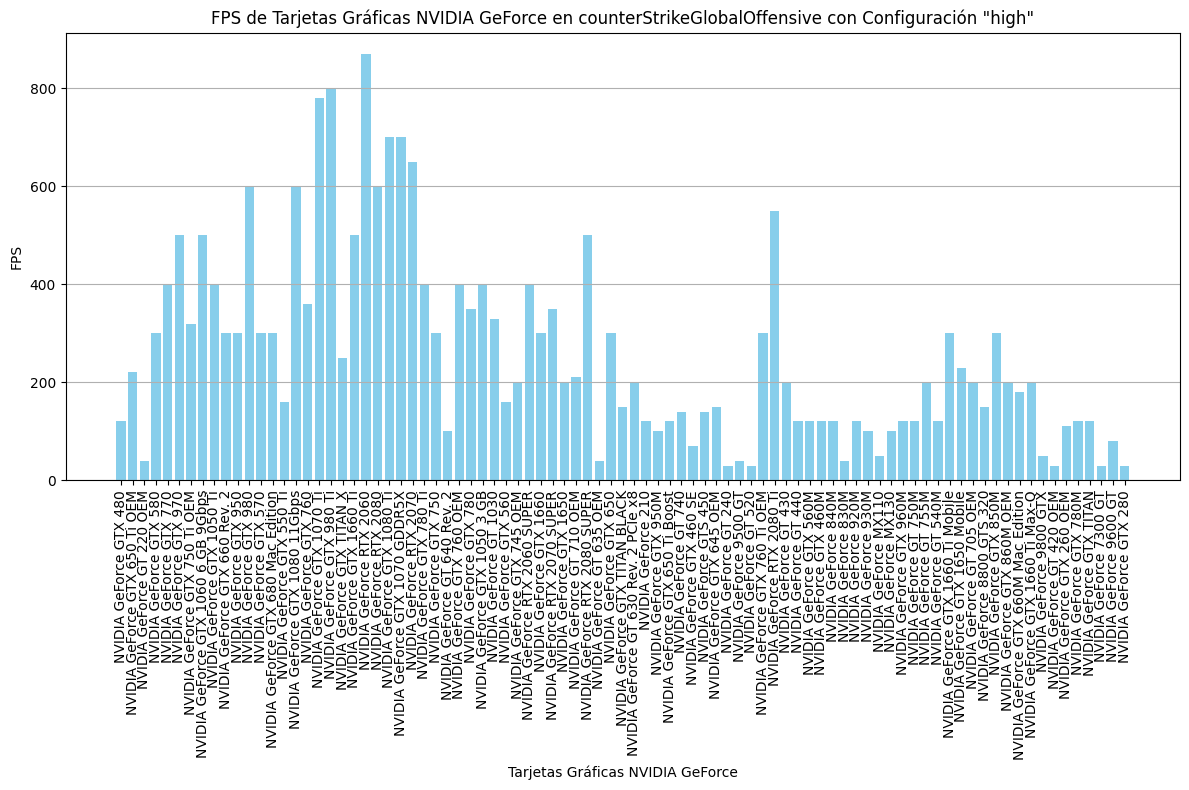

In [289]:
df_nvidia_high = df[(df['GpuName'].str.contains('NVIDIA GeForce', case=False)) & (df['GameName'] == 'counterStrikeGlobalOffensive') & (df['GameSetting'] == 'high')]

#Grafico de barras vs Graficas de NVIDIA en 'counterStrikeGlobalOffensive' con Configuración 'high' vs FPS
plt.figure(figsize=(12, 8))
plt.bar(df_nvidia_high['GpuName'], df_nvidia_high['FPS'], color='skyblue')
plt.title('FPS de Tarjetas Gráficas NVIDIA GeForce en counterStrikeGlobalOffensive con Configuración "high"')
plt.xlabel('Tarjetas Gráficas NVIDIA GeForce')
plt.ylabel('FPS')
plt.xticks(rotation=90)
plt.grid(axis='y')  
plt.tight_layout()
plt.show()

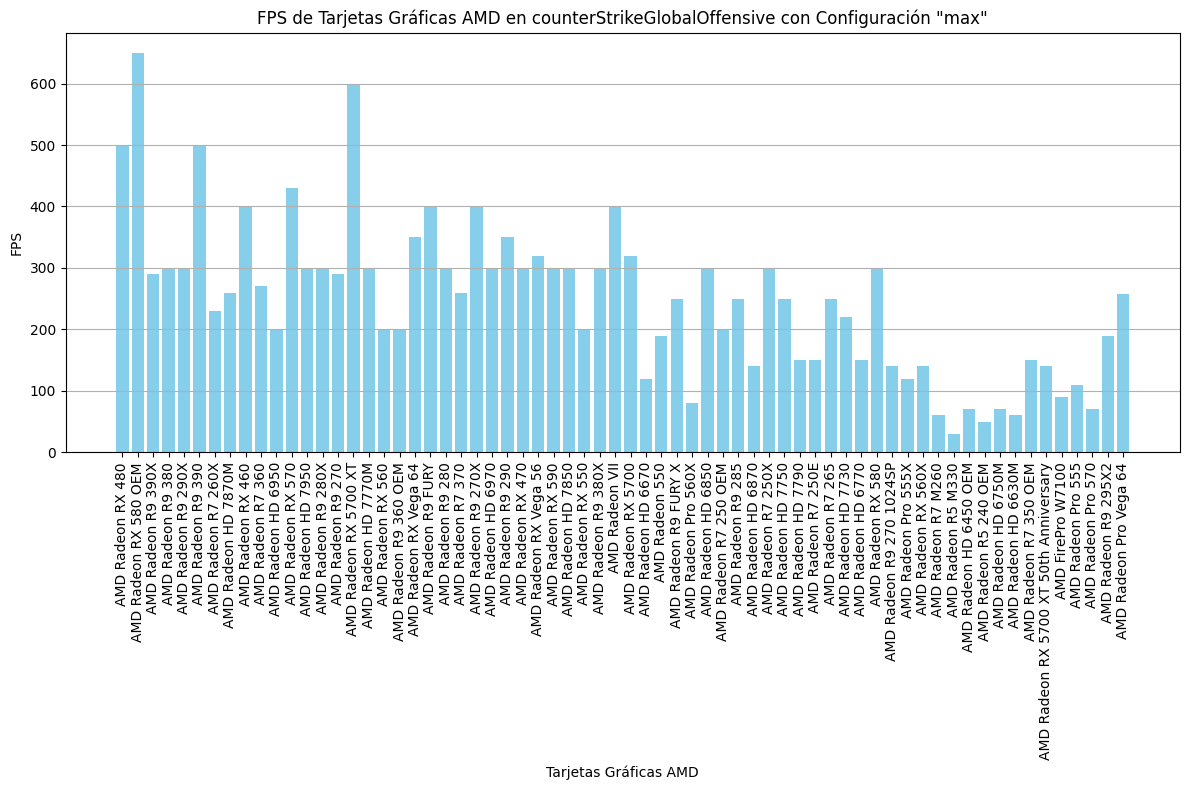

In [290]:
df_amd_max = df[(df['GpuName'].str.contains('AMD', case=False)) & (df['GameName'] == 'counterStrikeGlobalOffensive') & (df['GameSetting'] == 'max')]

#Grafico de barras vs Graficas de AMD en 'counterStrikeGlobalOffensive' con Configuración 'max' vs FPS
plt.figure(figsize=(12, 8))
plt.bar(df_amd_max['GpuName'], df_amd_max['FPS'], color='skyblue')
plt.title('FPS de Tarjetas Gráficas AMD en counterStrikeGlobalOffensive con Configuración "max"')
plt.xlabel('Tarjetas Gráficas AMD')
plt.ylabel('FPS')
plt.xticks(rotation=90) 
plt.grid(axis='y') 
plt.tight_layout()
plt.show()

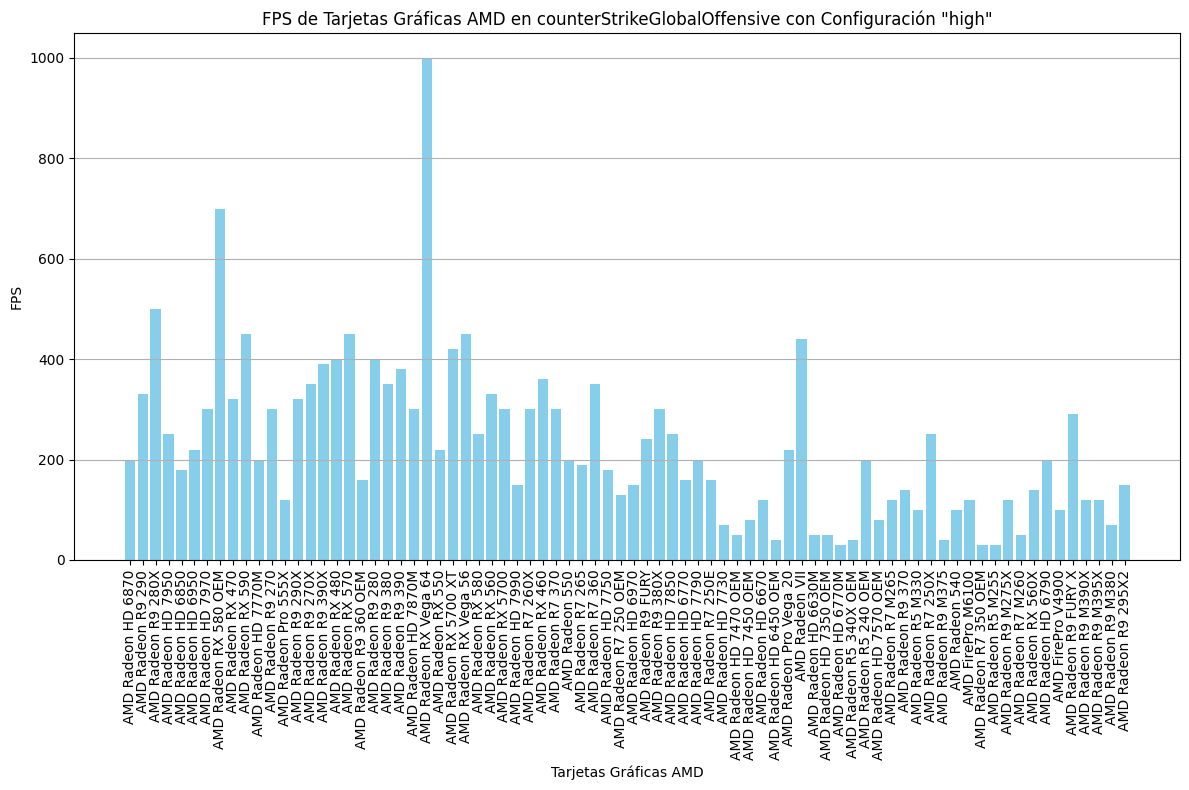

In [291]:
df_amd_high = df[(df['GpuName'].str.contains('AMD', case=False)) & (df['GameName'] == 'counterStrikeGlobalOffensive') & (df['GameSetting'] == 'high')]

#Grafico de barras vs Graficas de AMD en 'counterStrikeGlobalOffensive' con Configuración 'high' vs FPS
plt.figure(figsize=(12, 8))
plt.bar(df_amd_high['GpuName'], df_amd_high['FPS'], color='skyblue')
plt.title('FPS de Tarjetas Gráficas AMD en counterStrikeGlobalOffensive con Configuración "high"')
plt.xlabel('Tarjetas Gráficas AMD')
plt.ylabel('FPS')
plt.xticks(rotation=90)  
plt.grid(axis='y')  
plt.tight_layout()
plt.show()

## Entrega Proyecto 2

## Preámbulo del Modelamiento

En la presente entrega se detallan las variables que se utilizarán para realizar el modelamiento, con el fin de estudiar su comportamiento y su similitud con alguna distribución que fueron estudiadas en clases.

**Variables del modelamiento:**

1.   FPS
2.   GameSetting




In [292]:
from scipy import stats

# Realizar la prueba de normalidad
k2, p = stats.normaltest(df_nvidia_rtx_max['FPS'])

# Imprimir los resultados
print("Estadística de prueba:", k2)
print("Valor p:", p)

if p < 0.05:
    print("Los datos no siguen una distribución normal")
else:
    print("Los datos siguen una distribución normal")


Estadística de prueba: 900.62445661539
Valor p: 2.703236933316978e-196
Los datos no siguen una distribución normal


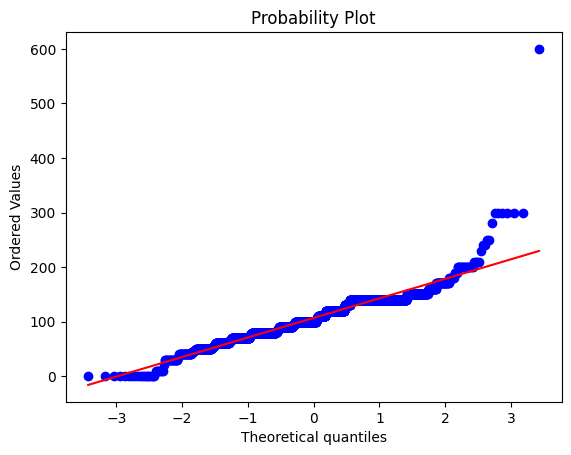

Estadística de prueba: 0.9144383022013699
Valor p: 3.938940873168525e-34


In [293]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Generar un gráfico de probabilidad para una distribución normal
stats.probplot(df_nvidia_rtx_max['FPS'], dist="norm", plot=plt)
plt.show()

# Realizar la prueba de normalidad de Shapiro-Wilk
shapiro_test = stats.shapiro(df_nvidia_rtx_max['FPS'])
print("Estadística de prueba:", shapiro_test.statistic)
print("Valor p:", shapiro_test.pvalue)


A partir de los gráficos obtenidos en la Entrega 1, se puede observar que el gráfico de barras de procesadores Intel en 'Apex Legends' con Configuración 'max' vs FPS muestra un comportamiento que, a simple vista, se asemeja a una distribución normal. Por esta razón, además de nuestra elección de variable, realizaremos el estudio a partir de estos datos.

1. En primera instancia usamos procesadores Intel para realizar un histograma que indique a simple vista el comportamiento

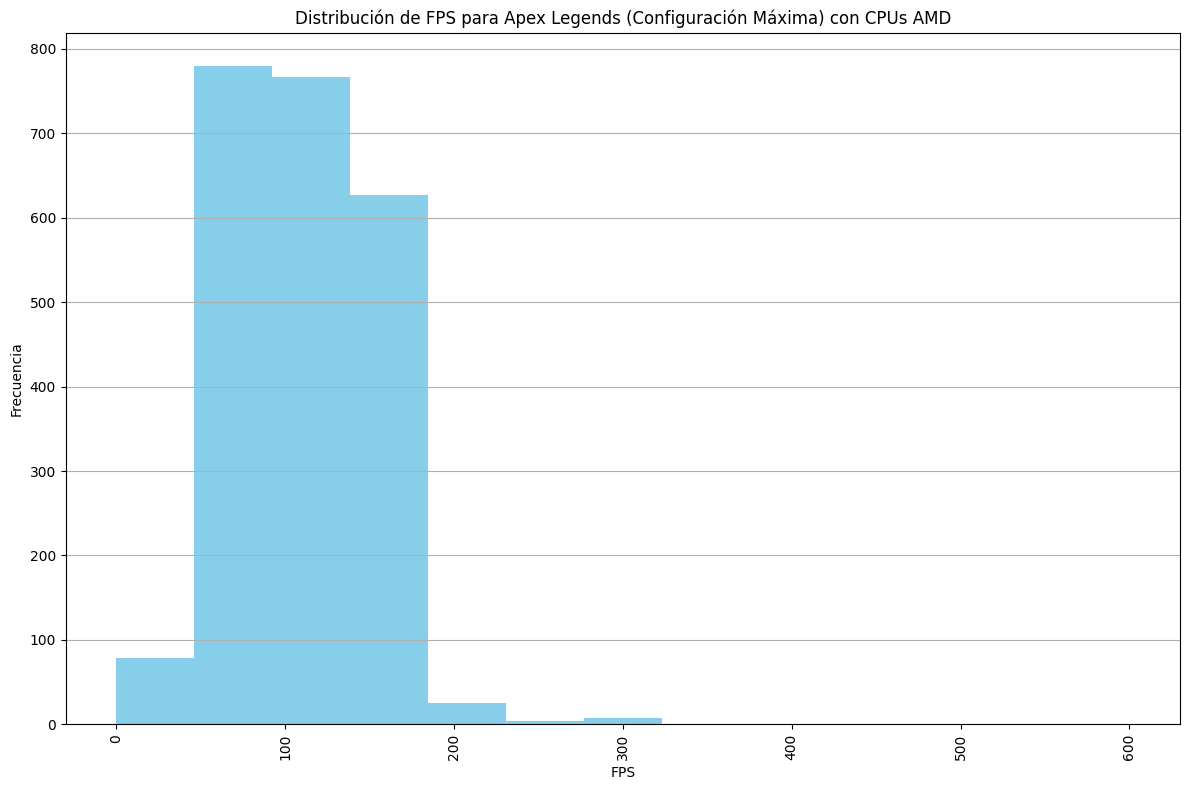

In [294]:
#Filtrar el DataFrame según los criterios especificados
df_nvidia_rtx_max2 = df[(df['CpuName'].str.contains('Intel', case=False)) & 
                       (df['GameName'] == 'apexLegends') & 
                       (df['GameSetting'] == 'max')]

#Crear el histograma
plt.figure(figsize=(12, 8))
num_binsr1 = int(np.ceil(np.log2(len(df_nvidia_rtx_max2['FPS'])) + 1))
plt.hist(df_nvidia_rtx_max2['FPS'], bins=num_binsr1, color='skyblue')

#Añadir etiquetas y título
plt.xlabel('FPS')
plt.ylabel('Frecuencia')
plt.title('Distribución de FPS para Apex Legends (Configuración Máxima) con CPUs AMD')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

2. Ahora se realizara el mismo histograma pero con CPU AMD.

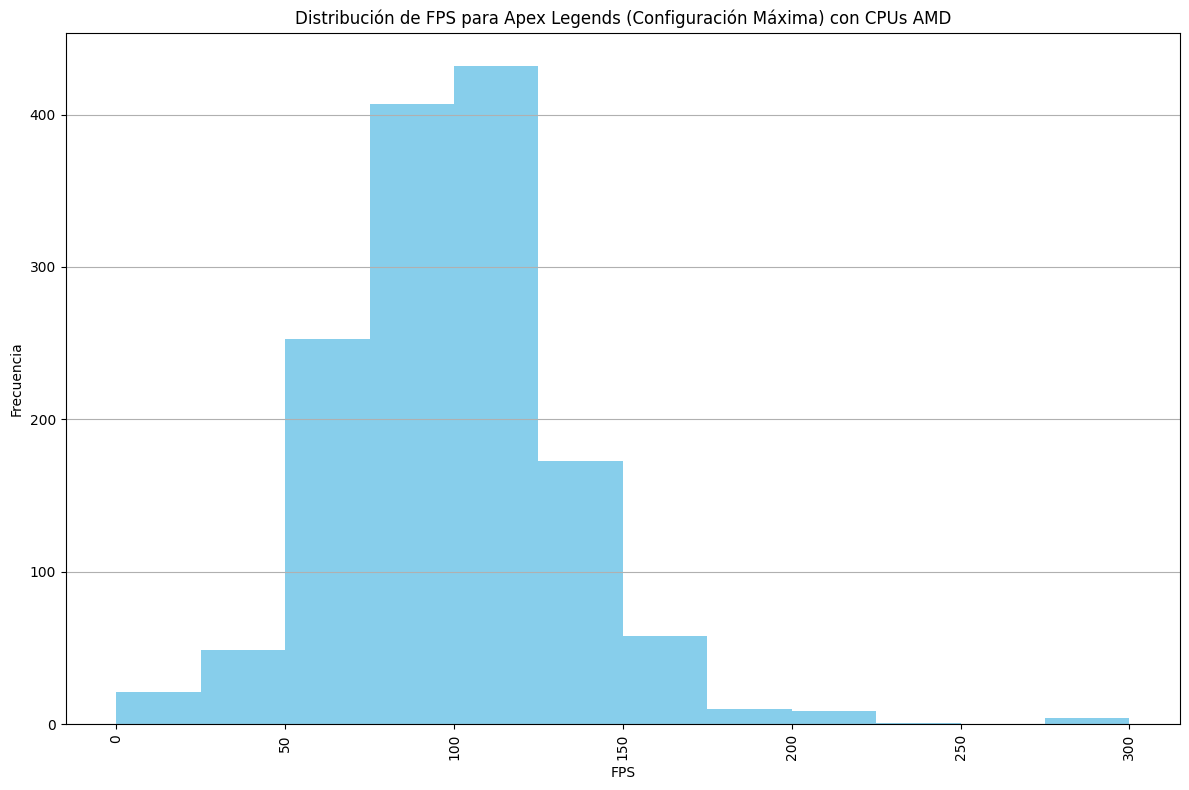

In [295]:
#Filtrar el DataFrame según los criterios especificados
df_amd1 = df[(df['CpuName'].str.contains('AMD', case=False)) & 
                       (df['GameName'] == 'apexLegends') & 
                       (df['GameSetting'] == 'max')]

#Crear el histograma
plt.figure(figsize=(12, 8))
num_binsa1 = int(np.ceil(np.log2(len(df_amd1['FPS'])) + 1))
plt.hist(df_amd1['FPS'], bins=num_binsa1, color='skyblue')

#Añadir etiquetas y título
plt.xlabel('FPS')
plt.ylabel('Frecuencia')
plt.title('Distribución de FPS para Apex Legends (Configuración Máxima) con CPUs AMD')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

3. Es posible distinguir que se asemeja bastante a una distribución normal. Realizaremos otras pruebas modificando otro parámetro importante, como lo es la CpuFrequency.

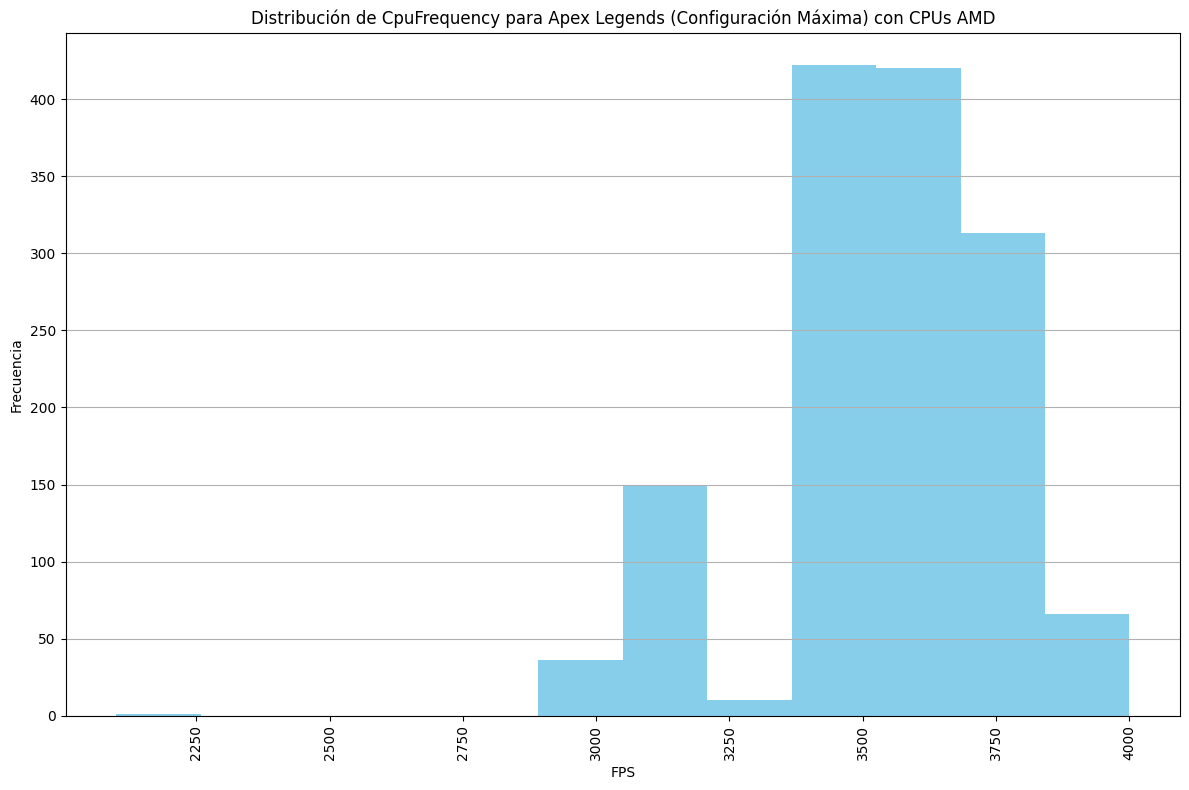

In [296]:
#Filtrar el DataFrame según los criterios especificados
df_amd2 = df[(df['CpuName'].str.contains('AMD', case=False)) & 
                       (df['GameName'] == 'apexLegends') & 
                       (df['GameSetting'] == 'max')]

#Crear el histograma
plt.figure(figsize=(12, 8))
num_binsa2 = int(np.ceil(np.log2(len(df_amd2['CpuFrequency'])) + 1))
plt.hist(df_amd2['CpuFrequency'], bins=num_binsa2, color='skyblue')

#Añadir etiquetas y título
plt.xlabel('FPS')
plt.ylabel('Frecuencia')
plt.title('Distribución de CpuFrequency para Apex Legends (Configuración Máxima) con CPUs AMD')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

4. Viendo todos los graficos es mejor utilizar el del punto 2, es por eso que se verifica si se asemeja a una Distribucion Normal.

2024-06-03 22:38:02.505 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.005598)
2024-06-03 22:38:02.515 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.007607)
2024-06-03 22:38:02.570 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.008513)


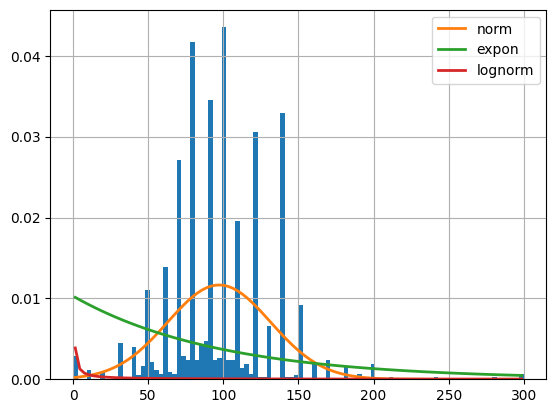

In [297]:
import warnings
from scipy.stats import norm, expon, lognorm
from fitter import Fitter

#Fitting different distributions
f = Fitter(df_amd1['FPS'], distributions=['norm', 'expon', 'lognorm'])
f.fit()
f.summary()

# Ignorar posibles advertencias
warnings.filterwarnings("ignore")

Con el resultado anterior se puede apreciar que el conjunto de datos con las variables escogidas para el modelamiento se asemeja bastante a una distribución normal, puesto que el error es igual a 0.005598, siendo el más pequeño de las otras distribuciones evaluadas.

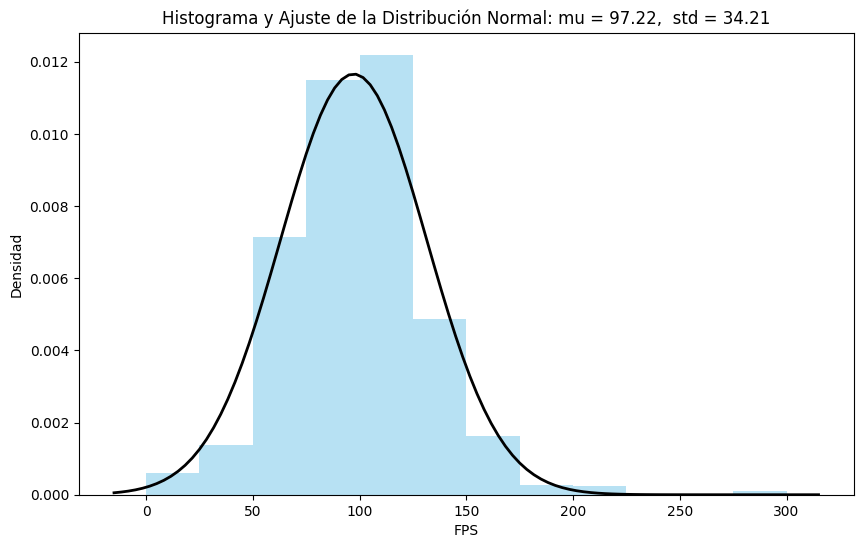

In [298]:
import numpy as np

plt.figure(figsize=(10, 6))
num_binsamd1 = int(np.ceil(np.log2(len(df_amd1['FPS'])) + 1))
plt.hist(df_amd1['FPS'], bins=num_binsamd1, density=True, alpha=0.6, color='skyblue')

# Parámetros de la distribución normal ajustada
mu, std = norm.fit(df_amd1['FPS'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

#Graficar la curva de densidad de la distribución normal
plt.plot(x, p, 'k', linewidth=2)
title = "Histograma y Ajuste de la Distribución Normal: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.xlabel('FPS')
plt.ylabel('Densidad')
plt.show()


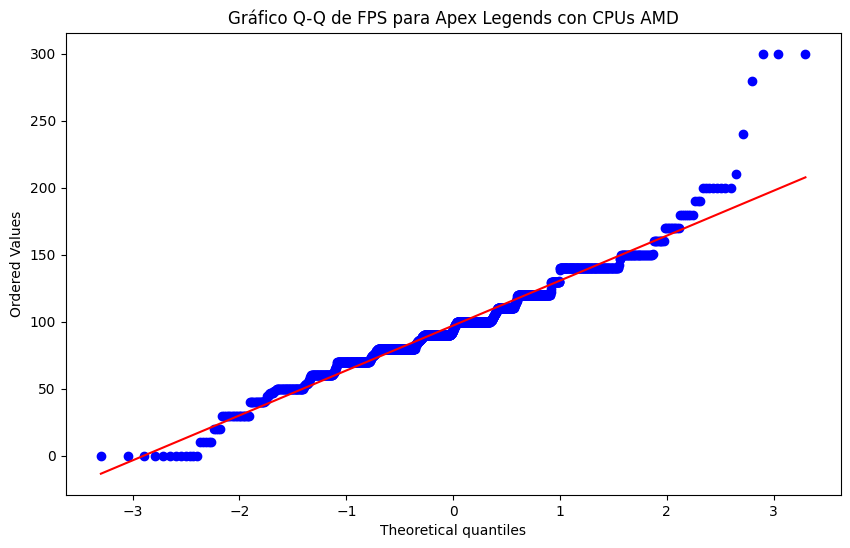

In [299]:
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(df_amd1['FPS'], dist="norm", plot=plt)
plt.title("Gráfico Q-Q de FPS para Apex Legends con CPUs AMD")
plt.show()

Ahora calculamos el estimador a través del Método de los Momentos.

In [300]:
#Calcular la media y la desviación estándar de los datos
mean = np.mean(df_amd1['FPS'])
std_dev = np.std(df_amd1['FPS'])

# Imprimir los resultados
print("Estimación por el método de los momentos:")
print("Media estimada:", mean)
print("Desviación estándar estimada:", std_dev)

Estimación por el método de los momentos:
Media estimada: 97.22215949188426
Desviación estándar estimada: 34.21365313478039


Ahora calculamos el estimador a través del Método de Máxima Verosimilitud.

In [301]:
#Ajustar la distribución normal a los datos y obtener los parámetros estimados
params = norm.fit(df_amd1['FPS'])
mu_ml, std_ml = params

# Imprimir los resultados
print("\nEstimación por el método de máxima verosimilitud:")
print("Media estimada (método de máxima verosimilitud):", mu_ml)
print("Desviación estándar estimada (método de máxima verosimilitud):", std_ml)



Estimación por el método de máxima verosimilitud:
Media estimada (método de máxima verosimilitud): 97.22215949188426
Desviación estándar estimada (método de máxima verosimilitud): 34.21365313478039


## Bonus T5

### Enunciado:

Una nave espacial debe viajar periódicamente desde la *Vía Láctea* hasta la galaxia *M33*. Durante su viaje, la astronave encuentra *X* planetas con características similares a la Tierra. La probabilidad de que cualquiera de estos *X* planetas sea habitable por humanos es *p* = 0.2 independientemente de los demás. Si denotamos *Y* a la cantidad de planetas habitables encontrados y *X* sigue la siguiente f.d.p.

a) (35 %) Determine teórica y experimentalmente la f.d.p. conjunta de *X* e *Y*.

Respuesta:

In [302]:
import numpy as np
from collections import Counter

# Parámetros
p = 0.2
x_vals = [0, 1, 2, 3]
f_x = [0.1, 0.2, 0.3, 0.4]
num_simulations = 10000

# Generar X según su f.d.p.
X_simulated = np.random.choice(x_vals, size=num_simulations, p=f_x)

# Generar Y dado X
Y_simulated = [np.random.binomial(x, p) for x in X_simulated]

# Contar ocurrencias de (X, Y)
joint_distribution = Counter(zip(X_simulated, Y_simulated))

# Normalizar para obtener la f.d.p. conjunta
total = sum(joint_distribution.values())
joint_prob = {k: v/total for k, v in joint_distribution.items()}

print(joint_prob)


{(1, 0): 0.1569, (0, 0): 0.0984, (2, 0): 0.1876, (3, 0): 0.2104, (3, 2): 0.0408, (3, 1): 0.1607, (2, 1): 0.0909, (1, 1): 0.0401, (3, 3): 0.0033, (2, 2): 0.0109}


b) (35 %) Determine teórica y experimentalmente la f.d.p. marginal de *Y* y su valor esperado.

Respuesta:

In [303]:
#Obtener la marginal de Y
y_counts = Counter(Y_simulated)
marginal_y_prob = {y: count/num_simulations for y, count in y_counts.items()}

#Valor esperado de Y
E_Y = sum(y * prob for y, prob in marginal_y_prob.items())

print(marginal_y_prob)
print("E(Y):", E_Y)


{0: 0.6533, 2: 0.0517, 1: 0.2917, 3: 0.0033}
E(Y): 0.405


c) (30 %) Determine teórica y experimentalmente la f.d.p. condicional de *X* al valor *Y* = 1. Determine
además E(*X*|*Y* = 1).

Respuesta:

In [304]:
#Filtrar simulaciones donde Y=1
X_given_Y1 = [x for x, y in zip(X_simulated, Y_simulated) if y == 1]

#Obtener la f.d.p. condicional de X dado Y=1
x_given_y1_counts = Counter(X_given_Y1)
total_given_y1 = sum(x_given_y1_counts.values())
conditional_x_given_y1_prob = {x: count/total_given_y1 for x, count in x_given_y1_counts.items()}

#Valor esperado de X dado Y=1
E_X_given_Y1 = sum(x * prob for x, prob in conditional_x_given_y1_prob.items())

print(conditional_x_given_y1_prob)
print("E(X|Y=1):", E_X_given_Y1)


{3: 0.5509084676037024, 2: 0.31162152896811796, 1: 0.13747000342817964}
E(X|Y=1): 2.4134384641755227
